In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
import os
import re
from pathlib import Path
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
import nltk
from nltk.corpus import stopwords

In [16]:
# Загрузка стоп-слов
nltk.download("stopwords")
russian_stopwords = set(stopwords.words("russian"))
custom_stopwords = {"сноска","и", "в", "во","и", "в", "во", "не", "что", "он", "на", "я", \
"с", "со", "как", "а", "то", "все", "она", "так", "его", "но", "да", "ты", "к", "у", "же", "вы", "за",\
 "бы", "по", "только", "ее", "мне", "было", "вот", "от", "меня", "еще", "нет", "о", "из", "ему", "теперь",\
   "когда", "даже", "ну", "ли", "если", "уже", "или", "ни", "быть", "был", "него", "до", "вас",\
     "нибудь", "опять", "уж", "вам", "ведь", "там", "потом", "себя", "ничего", "ей", "может", "они", \
     "тут", "где", "есть", "надо", "ней", "для", "мы", "тебя", "их", "чем", "была", "сам", "чтоб", \
     "без", "будто", "чего", "раз", "тоже", "себе", "под", "лесков", "будет", "ж", "тогда", "кто", \
     "этот", "говорил", "того", "потому", "этого", "какой", "совсем", "ним", "здесь", "этом",\
       "один", "почти", "мой", "тем", "чтобы", "нее", "кажется", "сейчас", "были", "куда",\
         "зачем", "сказать", "всех", "никогда", "можно", "при", "наконец", "два",\
           "об", "хоть", "после", "над", "тот", "через", "эти", "нас", "про",\
             "них", "какая", "много", "разве", "три", "эту", "моя", "впрочем", "свою",\
               "этой", "перед", "иногда", "лучше", "чуть", "том", "нельзя", "такой", "им", "более",\
                 "всегда", "конечно", "всю","это",\
                   "не", "что", "он", "на", "я", "с",\
                     "со", "как", "н", "то", "все", "она", "так", "г", "очень", "стр", "ты", "к", \
                     "у", "же", "вы", "за", "бы", "по", "только", "ее", "мне", "было", "вот", "от",\
                       "меня", "еще", "нет", "о", "из", "ему", "теперь", "когда", "даже", "ну", "вдруг",\
                         "ли", "если", "уже", "или", "ни", "быть", "был", "него", "до", "вас",\
                           "опять", "уж", "вам", "ведь", "там", "потом", "себя", "ничего", "ей", \
                           "может", "они", "тут", "где", "есть", "надо", "ней", "для", "мы", "тебя",\
                             "их", "чем", "была", "сам", "чтоб", "без", "будто", "чего", "раз", "тоже",\
                               "себе", "под", "будет", "ж", "тогда", "кто", "этот",\
                                 "того", "потому", "этого", "какой", "совсем", "ним", "здесь", "этом", \
                                 "почти", "мой", "тем", "чтобы", "нее", "кажется", \
                                   "были", "куда", "зачем", "сказать", "всех", "никогда",  \
                                   "можно", "при", "наконец", "два", "об", "другой", "хоть", "после",\
                                     "над", "больше", "тот", "через", "эти", "нас", "про", "них", "какая",\
                                       "много", "разве", "три", "эту", "моя", "впрочем", "свою",\
                                         "этой", "перед", "иногда", "чуть", "том",\
                                           "такой", "им", "более", "конечно"}

russian_stopwords.update(custom_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Загрузка текстов из папки
def load_texts_from_folder(folder_path):
    texts = []
    for file_path in Path(folder_path).glob("*.txt"):
        with open(file_path, "r", encoding="utf-8") as f:
            texts.append(f.read())
    return texts


# Основной процесс
folder_path = Path("e:/cleaned_text")
texts = load_texts_from_folder(folder_path)

In [18]:

# Очистка текста
def clean_text(text):
    text = re.sub(r"[^\w\s]", "", text)  # Убираем пунктуацию
    text = re.sub(r"\s+", " ", text)  # Убираем лишние пробелы
    return text.lower()

# Генерация n-грамм
def generate_ngrams(tokens, n=1):
    return list(ngrams(tokens, n))

# Частотный анализ
def analyze_frequencies(tokens, n=1, top_n=20):
    if n == 1:
        tokens = [word for word in tokens if word not in russian_stopwords]
    ngrams_list = generate_ngrams(tokens, n)
    ngram_counts = Counter(ngrams_list)
    return ngram_counts.most_common(top_n)

# Анализ предложений
# Разбиение текста на предложения
def split_into_sentences(text):
    sentences = re.split(r'[.!?]', text)
    return [sentence.strip() for sentence in sentences if sentence.strip()]

# Анализ предложений
def analyze_sentences(texts):
    all_sentences = []
    for text in texts:
        sentences = split_into_sentences(text)
        all_sentences.extend(sentences)
    
    total_sentences = len(all_sentences)
    total_words = sum(len(sentence.split()) for sentence in all_sentences)
    avg_sentence_length = total_words / total_sentences if total_sentences > 0 else 0
    
    return total_sentences, avg_sentence_length


Общее количество предложений: 149142
Средняя длина предложения: 14.00 слов


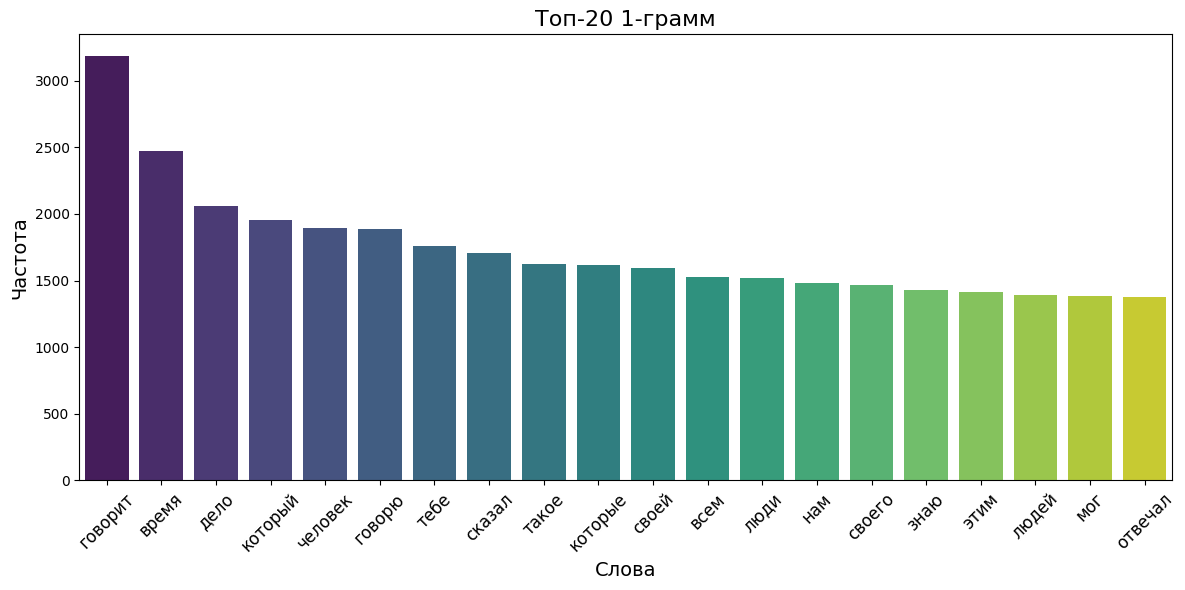

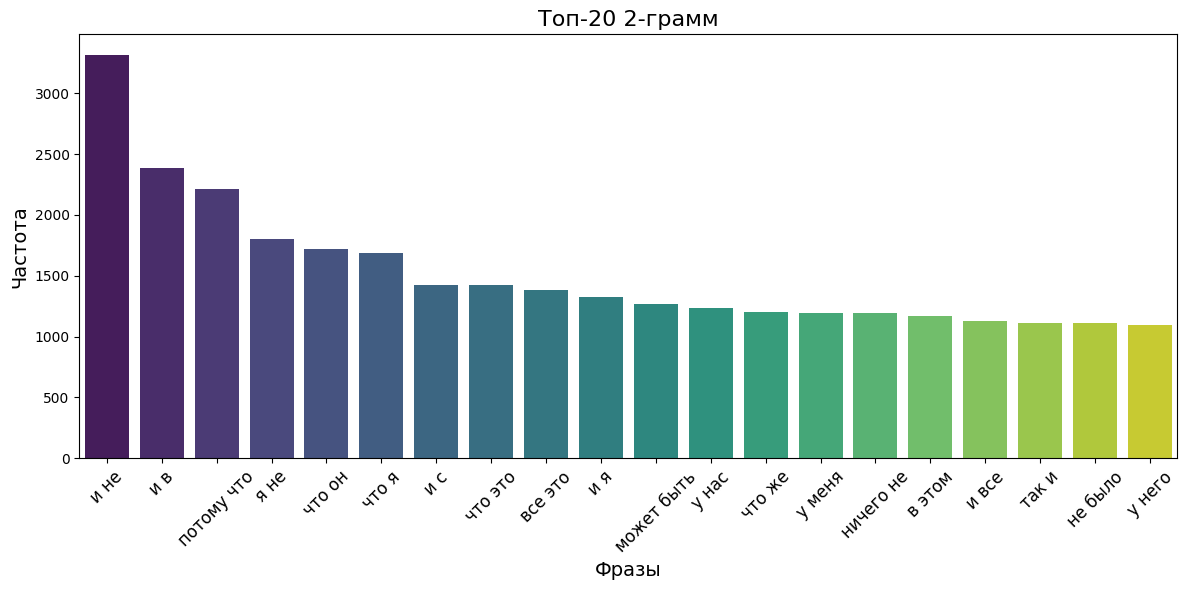

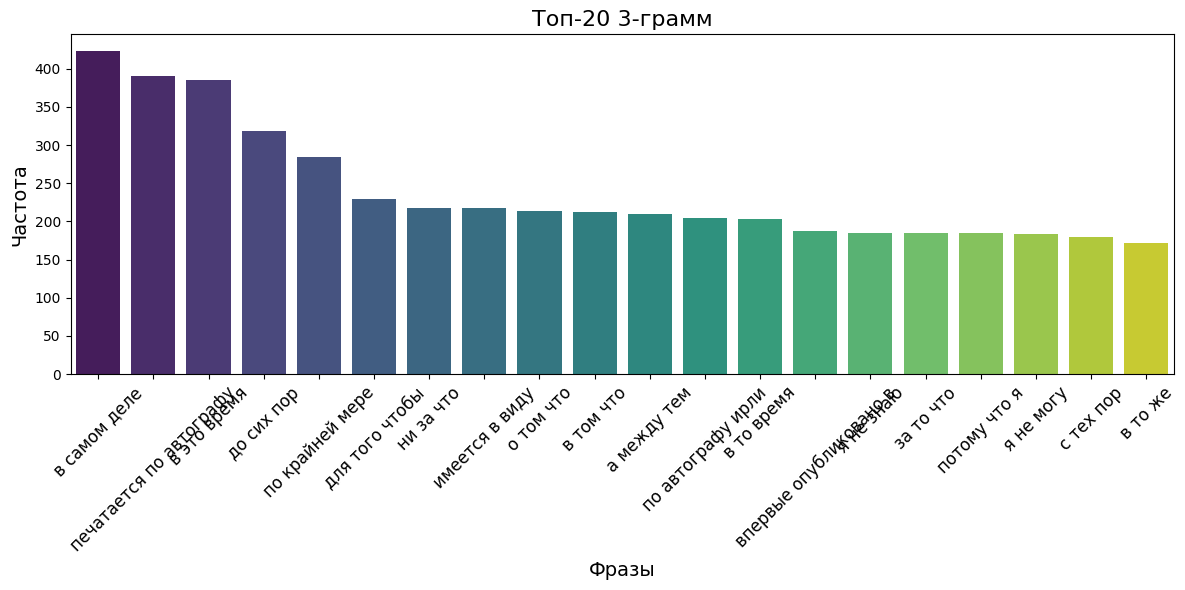

In [19]:
# Визуализация частотности
def plot_frequencies(ngrams_counts, n=1):
    ngrams_df = pd.DataFrame(ngrams_counts, columns=["ngram", "count"])
    ngrams_df["ngram"] = ngrams_df["ngram"].apply(lambda x: " ".join(x))
    plt.figure(figsize=(12, 6))
    sns.barplot(x="ngram", y="count", data=ngrams_df, palette="viridis")
    plt.title(f"Топ-{len(ngrams_counts)} {n}-грамм", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.ylabel("Частота", fontsize=14)
    plt.xlabel("Фразы" if n > 1 else "Слова", fontsize=14)
    plt.tight_layout()
    plt.show()



# Обработка текстов
cleaned_texts = [clean_text(text) for text in texts]
tokens = [word for text in cleaned_texts for word in text.split()]

# Частотный анализ
unigrams = analyze_frequencies(tokens, n=1, top_n=20)
bigrams = analyze_frequencies(tokens, n=2, top_n=20)
trigrams = analyze_frequencies(tokens, n=3, top_n=20)

# Преобразование в таблицы pandas
unigrams_df = pd.DataFrame(unigrams, columns=["term", "count"])
bigrams_df = pd.DataFrame(bigrams, columns=["term", "count"])
bigrams_df["term"] = bigrams_df["term"].apply(lambda x: " ".join(x))
trigrams_df = pd.DataFrame(trigrams, columns=["term", "count"])
trigrams_df["term"] = trigrams_df["term"].apply(lambda x: " ".join(x))

# Анализ предложений
# Анализ предложений
total_sentences, avg_sentence_length = analyze_sentences(texts)

# Вывод результатов
print(f"Общее количество предложений: {total_sentences}")
print(f"Средняя длина предложения: {avg_sentence_length:.2f} слов")

# Сохранение результатов в CSV
output_folder = Path("e:/analysis_results")
output_folder.mkdir(exist_ok=True)

# unigrams_df.to_csv(output_folder / "unigrams.csv", index=False)
# bigrams_df.to_csv(output_folder / "bigrams.csv", index=False)
# trigrams_df.to_csv(output_folder / "trigrams.csv", index=False)

# Визуализация
plot_frequencies(unigrams, n=1)
plot_frequencies(bigrams, n=2)
plot_frequencies(trigrams, n=3)


In [20]:
unigrams_df.head(40)

,term,count
0,"(говорит,)",3189
1,"(время,)",2469
2,"(дело,)",2059
3,"(который,)",1956
4,"(человек,)",1895
5,"(говорю,)",1885
6,"(тебе,)",1763
7,"(сказал,)",1707
8,"(такое,)",1625
9,"(которые,)",1614


In [21]:
unigrams_df.sample(20)

,term,count
15,"(знаю,)",1432
13,"(нам,)",1480
6,"(тебе,)",1763
5,"(говорю,)",1885
18,"(мог,)",1387
1,"(время,)",2469
8,"(такое,)",1625
19,"(отвечал,)",1376
4,"(человек,)",1895
11,"(всем,)",1529


In [22]:
bigrams_df.sample(20)

,term,count
13,у меня,1192
0,и не,3319
11,у нас,1234
9,и я,1323
17,так и,1113
6,и с,1427
12,что же,1203
16,и все,1131
18,не было,1112
10,может быть,1265


In [23]:
trigrams_df.sample(20)

,term,count
17,я не могу,183
3,до сих пор,318
6,ни за что,218
18,с тех пор,179
15,за то что,185
9,в том что,212
10,а между тем,210
1,печатается по автографу,390
4,по крайней мере,284
8,о том что,214
